# HANDWRITTEN DIGIT CLASSIFICATION

Handwritten digit classification algorithm:

1. **Data Preparation:**
   - Load the MNIST dataset.
   - Preprocess data (normalize pixel values).

2. **Model Architecture:**
   - Define a Convolutional Neural Network (CNN).
   - Choose activation functions, loss function, and optimization algorithm.

3. **Model Training:**
   - Split the dataset into training and testing sets.
   - Train the model on the training set using backpropagation.

4. **Evaluation:**
   - Evaluate the trained model on the test set.

5. **Hyperparameter Tuning:**
   - Experiment with hyperparameters for optimal performance.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
# Build the convolutional neural network (CNN) model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


750/750 [==============================] - 38s 44ms/step - loss: 0.2135 - accuracy: 0.9329 - val_loss: 0.0689 - val_accuracy: 0.9809
Epoch 2/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0541 - val_accuracy: 0.9845
Epoch 3/5
750/750 [==============================] - 32s 42ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0489 - val_accuracy: 0.9853
Epoch 4/5
750/750 [==============================] - 32s 42ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0455 - val_accuracy: 0.9867
Epoch 5/5
750/750 [==============================] - 32s 43ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0365 - val_accuracy: 0.9893


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0291 - accuracy: 0.9911
Test accuracy: 0.991100013256073


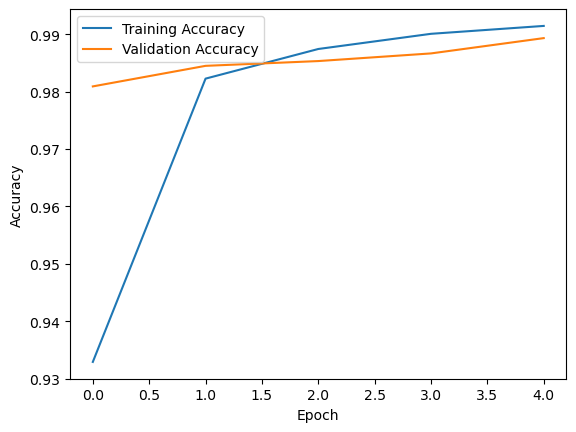

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
#GUI Application
import tkinter as tk
from tkinter import Canvas, Button, Label, PhotoImage
import numpy as np
from PIL import Image, ImageDraw
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r'C:\Users\ibvv\mnist.h5')

# GUI Application
class DigitClassifierApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Classifier")

        self.canvas = Canvas(root, width=280, height=280, bg="white", cursor="cross")
        self.canvas.grid(row=0, column=0, pady=10)

        self.label_result = Label(root, text="Prediction: None", font=("Helvetica", 16))
        self.label_result.grid(row=1, column=0, pady=10)

        self.button_clear = Button(root, text="Clear", command=self.clear_canvas)
        self.button_clear.grid(row=2, column=0, pady=10)

        self.image = Image.new("L", (280, 280), 0)
        self.draw = ImageDraw.Draw(self.image)
        self.canvas.bind("<B1-Motion>", self.paint)

    def paint(self, event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=20)
        self.draw.line([x1, y1, x2, y2], fill="black", width=20)

    def clear_canvas(self):
        self.canvas.delete("all")
        self.label_result.config(text="Prediction: None")

    def classify_digit(self):
        resized_image = self.image.resize((28, 28))
        array_image = np.array(resized_image) / 255.0
        input_data = array_image.reshape((1, 28, 28, 1))
        prediction = model.predict(input_data)
        predicted_digit = np.argmax(prediction)

        self.label_result.config(text=f"Prediction: {predicted_digit}")

# Create and run the GUI
root = tk.Tk()
app = DigitClassifierApp(root)

classify_button = Button(root, text="Classify", command=app.classify_digit)
classify_button.grid(row=3, column=0, pady=10)

root.mainloop()

1/1 [==============================] - 0s 104ms/step
